# Goodness-of-Fit Tests

One of the traditional statistical approaches, the Goodness-of-Fit tests gives a solution to validate our theoretical assumptions about data distributions. 

This notebook discusses the Goodness-of-Fit test with some common data distributions using Python code.

In [7]:
# create the environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# 1. Chi-square goodness of fit test

# Uniform Distribution

In [8]:
# Create a dataset with observed frequencies of dice rolls
dice = {
    'face': [1, 2, 3, 4, 5, 6],
    'observed': [17, 11, 18, 12, 15, 17]
}

# Convert to a DataFrame
dice = pd.DataFrame(data)

# Display the dataset
print(df)

   face  observed
0     1        17
1     2        11
2     3        18
3     4        12
4     5        15
5     6        17


In [9]:
# Total frequency
total_freq = dice['observed'].sum()
print('Total Frequency : ', total_freq)

# Expected frequency
expected_freq = total_freq / 6
print('Expected Frequency : ', expected_freq)

Total Frequency :  90
Expected Frequency :  15.0


In [10]:
dice['expected'] = expected_freq
dice

,face,observed,expected
0,1,17,15.0
1,2,11,15.0
2,3,18,15.0
3,4,12,15.0
4,5,15,15.0
5,6,17,15.0


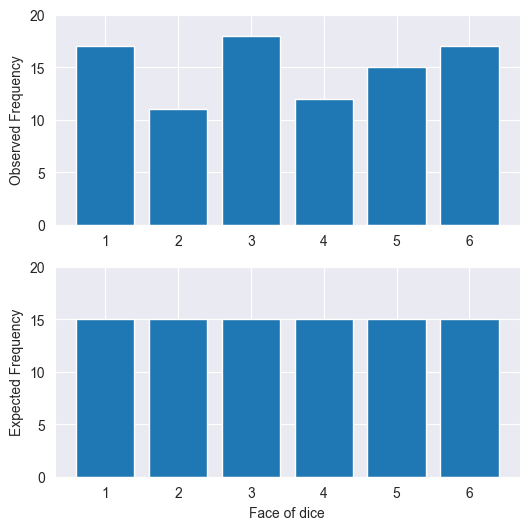

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize = (6,6))

# plot observed frequency
plt.subplot(211)
plt.bar(dice['face'], dice['observed'])
plt.ylabel('Observed Frequency')
plt.ylim([0,20])

# plot expected frequency
plt.subplot(212)
plt.bar(dice['face'], dice['expected'])
plt.ylabel('Expected Frequency')
plt.xlabel('Face of dice')
plt.ylim([0,20])
plt.show()

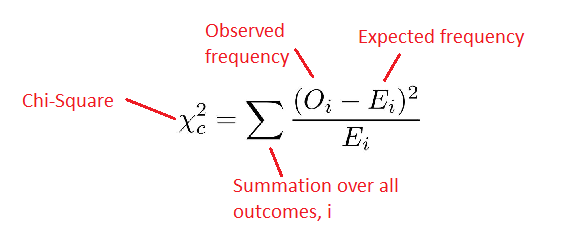

In [16]:
# a helper function to calculate the Chi-Square value

def Chi_Square(obs_freq, exp_freq):
  count = len(obs_freq)
  chi_sq = 0

  for i in range(count):
    x = (obs_freq[i] - exp_freq[i]) ** 2
    x = x / exp_freq[i]
    chi_sq += x

  return chi_sq


In [17]:
# calculate using the helper function
Chi_Square(dice['observed'], dice['expected'])

2.8

In [18]:
# calculate using the stats module of SciPy library
stats.chisquare(dice['observed'], dice['expected'])

Power_divergenceResult(statistic=2.8, pvalue=0.7307864865887586)

In [19]:
# critical Chi-Square - percent point function
DOF = len(dice['observed']) - 0 - 1
stats.chi2.ppf(0.95, DOF)

11.070497693516351

We can say that the data follows uniform distribution.

# Normal Distribution

# Step 1: Load the Data

Create a dataset containing the lifetimes of bulbs.

In [30]:
data = {
    'bulb': range(1, 41),
    'life': [31, 33, 34, 51, 24, 41, 58, 53, 27, 52, 40, 47, 37, 27, 31, 34, 34, 43, 55, 52, 29, 12, 49, 26, 64, 51, 61, 43, 34, 28, 27, 55, 40, 41, 47, 32, 24, 57, 31, 39]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

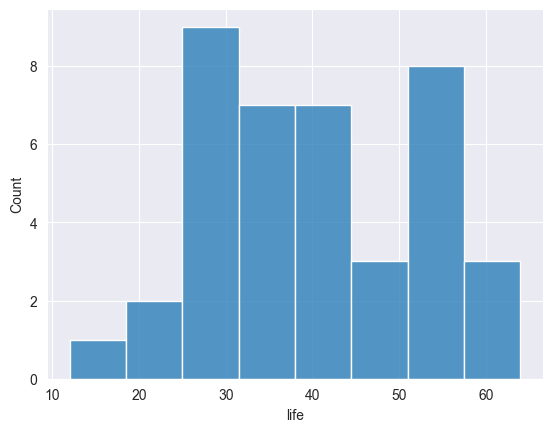

In [24]:
sns.histplot(data=df, x='life', bins=8)
plt.show()

# Step 2: Calculate Expected Frequencies

In [32]:
# Calculate the mean and standard deviation of the observed lifetimes
mean_life = df['life'].mean()
std_life = df['life'].std()

# Define the number of bins for the Chi-Square test
num_bins = 8

# Create bins and calculate observed frequencies
bins = np.linspace(df['life'].min(), df['life'].max(), num_bins + 1)
observed_freq, _ = np.histogram(df['life'], bins=bins)

# Calculate the expected frequencies assuming a normal distribution
expected_freq = np.diff(norm.cdf(bins, loc=mean_life, scale=std_life)) * len(df)

# Adjust the expected frequencies to match the total count of the observed frequencies
expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())

# Display the observed and expected frequencies
print("Observed Frequencies:", observed_freq)
print("Expected Frequencies:", expected_freq)

Observed Frequencies: [1 2 9 7 7 3 8 3]
Expected Frequencies: [1.17836225 2.95432441 5.59833388 8.01923342 8.68381134 7.10882934
 4.39925505 2.05785031]


# Step 3: Perform Chi-Square Goodness of Fit Test

In [33]:
from scipy.stats import chisquare

# Perform the Chi-Square goodness of fit test
chi_stat, p_value = chisquare(observed_freq, expected_freq)

# Display the results
print(f"Chi-Square Statistic: {chi_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 8.611611484606644
P-value: 0.2817559073825414


The significance of the results is evaluated based on the p-value. If the p-value is less than the significance level (alpha), we reject the null hypothesis, indicating that the observed lifetimes do not follow a normal distribution. Otherwise, we fail to reject the null hypothesis.

# 2. Kolmogorov-Smirnov (K-S) test

The K-S test (Chakravart, Laha, and Roy, 1967) is used to decide if a sample comes from a population with a specific distribution. The K-S test is based on the empirical distribution function (ECDF). Given N ordered data points $Y_1$, $Y_2$, ..., $Y_N$, the ECDF is defined as:

$EN=n(i)/N$

where $n(i)$ is the number of points less than $Y_i$ and the $Y_i$ are ordered from smallest to largest value. This is a step function that increases by $1/N$ at the value of each ordered data point. The graph below is a plot of the empirical distribution function with a normal cumulative distribution function for 100 normal random numbers. The K-S test is based on the maximum distance between these two curves.

In [34]:
from IPython.display import Image
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

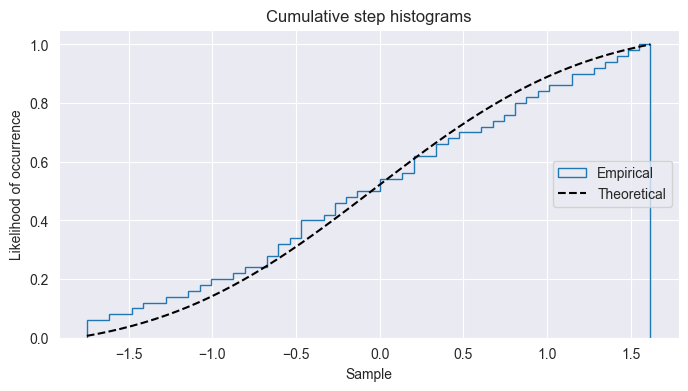

In [35]:
np.random.seed(100)

mu = 0
sigma = 1
n_bins = 50
x = np.random.normal(mu, sigma, size=50)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Sample')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

### Characteristics and Limitations of the K-S Test	

An attractive feature of this test is that the distribution of the K-S test statistic itself does not depend on the underlying cumulative distribution function being tested. Another advantage is that it is an exact test (the chi-square goodness-of-fit test depends on an adequate sample size for the approximations to be valid). Despite these advantages, the K-S test has several important limitations:

1. It only applies to continuous distributions.

2. It tends to be more sensitive near the center of the distribution than at the tails.

3. The distribution must be fully specified. That is, if location, scale, and shape parameters are estimated from the data, the critical region of the K-S test is no longer valid. It typically must be determined by simulation.

Several goodness-of-fit tests, such as the Anderson-Darling test and the Cramer Von-Mises test, are refinements of the K-S test. As these refined tests are generally considered to be more powerful than the original K-S test, many analysts prefer them. Also, the advantage for the K-S test of having the critical values be indpendendent of the underlying distribution is not as much of an advantage as first appears. This is due to limitation 3 above (i.e., the distribution parameters are typically not known and have to be estimated from the data). So in practice, the critical values for the K-S test have to be determined by simulation just as for the Anderson-Darling and Cramer Von-Mises (and related) tests.

Note that although the K-S test is typically developed in the context of continuous distributions for uncensored and ungrouped data, the test has in fact been extended to discrete distributions and to censored and grouped data.

### General Steps

The general steps to run the test are:

1. Create an EDF for your sample data (see Empirical Distribution Function for steps),
2. Specify a parent distribution (i.e. one that you want to compare your EDF to),
3. Graph the two distributions together.
4. Measure the greatest vertical distance between the two graphs.
5. Calculate the test statistic.
6. Find the critical value in the KS table.
7. Compare to the critical value.

#### Calculating the Test Statistic
The K-S test statistic measures the largest distance between the EDF $F_{data}(x)$ and the theoretical function $F_0(x)$, measured in a vertical direction (Kolmogorov as cited in Stephens 1992). The test statistic is given by:

$D = sup|F_{0}(x)-F_{data}(x)|$

Where (for a two-tailed test):

1. $F_0(x)$ = the cdf of the hypothesized distribution,
2. $F_{data}(x)$ = the empirical distribution function of your observed data.

For one-tailed test, omit the absolute values from the formula.
If D is greater than the critical value, the null hypothesis is rejected. Critical values for D are found in the K-S Test P-Value Table below:

## Example

We'll compare the distribution of candy consumption between two groups: "Chocoholics" and "Candy Lovers."

In [37]:
np.random.seed(42)
chocoholics = np.random.normal(loc=50, scale=10, size=100)  # Chocoholics consume more chocolate

candy_lovers = np.random.normal(loc=30, scale=15, size=100)  # Candy Lovers consume more candy

data = pd.DataFrame({
    'group': ['Chocoholics'] * len(chocoholics) + ['Candy Lovers'] * len(candy_lovers),
    'consumption': np.concatenate([chocoholics, candy_lovers])
})

print(data.head())
print(data.tail())

         group  consumption
0  Chocoholics    54.967142
1  Chocoholics    48.617357
2  Chocoholics    56.476885
3  Chocoholics    65.230299
4  Chocoholics    47.658466
            group  consumption
195  Candy Lovers    35.779761
196  Candy Lovers    16.742138
197  Candy Lovers    32.305877
198  Candy Lovers    30.873131
199  Candy Lovers    12.855446


We will use the scipy library to perform the K-S test and evaluate the difference in candy consumption distributions.

In [39]:
from scipy.stats import ks_2samp
ks_stat, p_value = ks_2samp(chocoholics, candy_lovers)

# Display the results
print(f"K-S Statistic: {ks_stat}")
print(f"P-value: {p_value}")

K-S Statistic: 0.66
P-value: 6.55317981883723e-21


If the p-value is less than the significance level (alpha), we reject the null hypothesis, indicating a significant difference in candy consumption between Chocoholics and Candy Lovers. Otherwise, we fail to reject the null hypothesis.

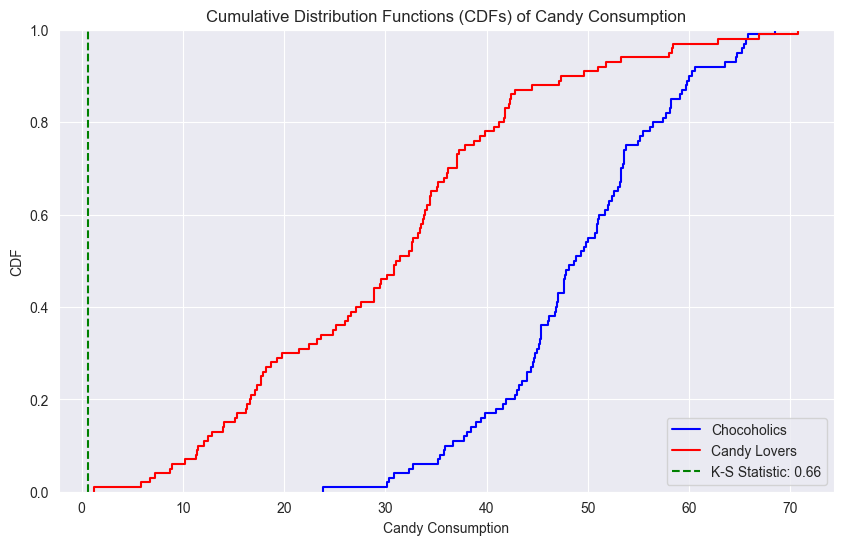

In [40]:
# Visualize the CDFs
plt.figure(figsize=(10, 6))

# Plot the CDF for Chocoholics
sns.ecdfplot(chocoholics, label='Chocoholics', color='blue')

# Plot the CDF for Candy Lovers
sns.ecdfplot(candy_lovers, label='Candy Lovers', color='red')

# Highlight the K-S statistic
plt.axvline(x=ks_stat, color='green', linestyle='--', label=f'K-S Statistic: {ks_stat:.2f}')

# Add labels and legend
plt.title('Cumulative Distribution Functions (CDFs) of Candy Consumption')
plt.xlabel('Candy Consumption')
plt.ylabel('CDF')
plt.legend()

# Show the plot
plt.show()